In [60]:
import torch
import matplotlib.pyplot as plt
import numpy as np
import cv2

In [61]:
# clone YOLOv5 repository
!git clone https://github.com/ultralytics/yolov5.git  # clone repo

fatal: Too many arguments.

usage: git clone [<options>] [--] <repo> [<dir>]

    -v, --verbose         be more verbose
    -q, --quiet           be more quiet
    --progress            force progress reporting
    --reject-shallow      don't clone shallow repository
    -n, --no-checkout     don't create a checkout
    --bare                create a bare repository
    --mirror              create a mirror repository (implies bare)
    -l, --local           to clone from a local repository
    --no-hardlinks        don't use local hardlinks, always copy
    -s, --shared          setup as shared repository
    --recurse-submodules[=<pathspec>]
                          initialize submodules in the clone
    --recursive ...       alias of --recurse-submodules
    -j, --jobs <n>        number of submodules cloned in parallel
    --template <template-directory>
                          directory from which templates will be used
    --reference <repo>    reference repository
    --refere

In [62]:
model = torch.hub.load('./yolov5', 'custom',
                       path='best_SH.pt', force_reload=True, source='local')

YOLOv5  2023-5-16 Python-3.7.16 torch-1.13.1+cpu CPU

Fusing layers... 
custom_YOLOv5s summary: 182 layers, 7249215 parameters, 0 gradients
Adding AutoShape... 


In [73]:
img = "D://Sneha//Intership of Arunoday Tech//Safety Vest Detection//Data//final_data//test//images//pos_1389.jpg"

In [74]:
result = model(img)

In [75]:
result.print()

image 1/1: 360x492 1 Hard-Hat, 1 Safety Vest
Speed: 34.8ms pre-process, 1521.6ms inference, 2.5ms NMS per image at shape (1, 3, 480, 640)


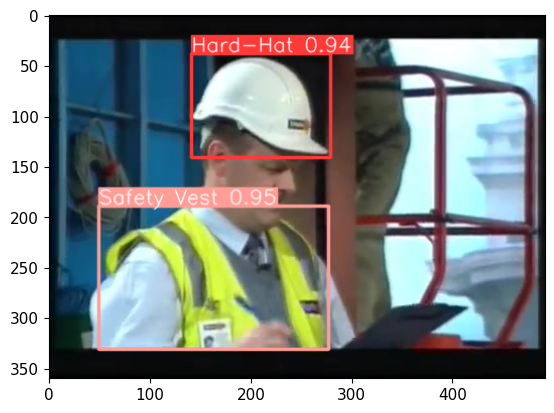

In [76]:
%matplotlib inline
plt.imshow(np.squeeze(result.render()))
plt.show()

In [77]:
boxes = result.xyxy[0].tolist()  # Get the bounding box coordinates as a list
print(boxes[0])
print(boxes[1])

# Extract individual box coordinates
for box in boxes:
    x, y, w, h = box[:4]
    print(x, y, w, h)

[49.631309509277344, 189.26876831054688, 277.5215759277344, 331.2635192871094, 0.9543046355247498, 1.0]
[141.11203002929688, 38.10492706298828, 279.0445861816406, 141.225830078125, 0.9425498843193054, 0.0]
49.631309509277344 189.26876831054688 277.5215759277344 331.2635192871094
141.11203002929688 38.10492706298828 279.0445861816406 141.225830078125


In [78]:
# Assuming boxes is a list of bounding box coordinates
boxes = result.xyxy[0].tolist()

# Extract individual box coordinates
box1_x, box1_y, box1_w, box1_h = boxes[0][:4]
box2_x, box2_y, box2_w, box2_h = boxes[1][:4]

# print the value of both box coordinates
print(box1_x, box1_y, box1_w, box1_h) # for safety vest
print(box2_x, box2_y, box2_w, box2_h) # for hard hat

49.631309509277344 189.26876831054688 277.5215759277344 331.2635192871094
141.11203002929688 38.10492706298828 279.0445861816406 141.225830078125


In [79]:
# for first label 
x1 = box2_x
y1 = box2_y
w1 = box2_w
h1 = box2_h
print(x1, y1, w1, h1)

# for second label
x2 = box1_x
y2 = box1_y
w2 = box1_w
h2 = box1_h
print(x2, y2, w2, h2)

141.11203002929688 38.10492706298828 279.0445861816406 141.225830078125
49.631309509277344 189.26876831054688 277.5215759277344 331.2635192871094


In [80]:
import torch
# Convert float values to Tensors for first box
x1_tensor = torch.tensor(x1)
y1_tensor = torch.tensor(y1)
w1_tensor = torch.tensor(w1)
h1_tensor = torch.tensor(h1)

# Convert float values to Tensors for second box
x2_tensor = torch.tensor(x2)
y2_tensor = torch.tensor(y2)
w2_tensor = torch.tensor(w2)
h2_tensor = torch.tensor(h2)

# Round the Tensor values for first box
x11 = int(torch.round(x1_tensor))
y11 = int(torch.round(y1_tensor))
x21 = int(torch.round(x1_tensor + w1_tensor))
y21 = int(torch.round(y1_tensor + h1_tensor))

# Round the Tensor values for first box
x12 = int(torch.round(x2_tensor))
y12 = int(torch.round(y2_tensor))
x22 = int(torch.round(x2_tensor + w2_tensor))
y22 = int(torch.round(y2_tensor + h2_tensor))

# Print the rounded values for first box
print(x11, y11, x21, y21)

# Print the rounded values for second box
print(x12, y12, x22, y22)

141 38 420 179
50 189 327 521


In [81]:
import cv2

# Window name in which image is displayed
window_name = 'Hard Hat Detection'

# Example values for start_point, end_point, color, and thickness
start_point = (x11, y11)
end_point = (x21, y21)
color = (255, 0, 0)
thickness = 2

# Load the image
image_path = "D://Sneha//Intership of Arunoday Tech//Safety Vest Detection//Data//final_data//test//images//pos_1389.jpg"
image = cv2.imread(image_path)
image = cv2.resize(image, (480, 360))

#image = np.array(result)

# Check if the image was loaded successfully
if image is None:
    print('Failed to load image')
else:
    # Convert the image to the appropriate data type
    #image = image.astype(np.uint8)

    # Draw a rectangle on the image
    image_f = cv2.rectangle(image, start_point, end_point, color, thickness)

    # Display the image
    cv2.imshow(window_name, image_f)
    cv2.waitKey(0)
    cv2.destroyAllWindows()


In [82]:
# start_point = (x12, y12)
# end_point = (x22, y22)

# Crop the image using NumPy indexing
cropped_image = image_f[y11:y21, x11:x21]

# Display the image
cv2.imshow(window_name, cropped_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [83]:
start_point_2 = (x12, y12)
end_point_2 = (x22, y22)

# print box coordinate of first label
print(start_point_2, end_point_2)
image_s = cv2.rectangle(image, start_point_2, end_point_2, color, thickness)
cv2.imshow(window_name, image_s)
cv2.waitKey(0)
cv2.destroyAllWindows()

(50, 189) (327, 521)


In [84]:
import cv2
import numpy as np

while True:

    #image_path = "D://Sneha//Intership of Arunoday Tech//Safety Vest Detection//Data//final_data//test//images//pos_1389.jpg"
    #image = cv2.imread(image_path)

    # copy a original image 
    # image_co = image.copy()

    img = cropped_image
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

    # Yellow color
    yellow_lower = np.array([25, 50, 70], np.uint8)
    yellow_upper = np.array([35, 255, 255], np.uint8)

    # Grey color
    grey_lower = np.array([0, 0, 40], np.uint8)
    grey_upper = np.array([180, 18, 230], np.uint8)

    # Red color
    red_lower = np.array([136, 87, 111], np.uint8)
    red_upper = np.array([180, 255, 255], np.uint8)

    # Brown color
    brown_lower = np.array([5, 0, 0], np.uint8)
    brown_upper = np.array([17,255,255], np.uint8)

    # Blue color
    blue_lower = np.array([110,50,50], np.uint8)
    blue_upper = np.array([130,255,255], np.uint8)

    # Green color
    green_lower = np.array([50, 50, 50], np.uint8)
    green_upper = np.array([70, 255, 255], np.uint8)

    # Pink color
    pink_lower = np.array([327, 38, 58], np.uint8)
    pink_upper = np.array([335, 95, 64], np.uint8)

    # White color
    white_lower = np.array([0, 0, 200], np.uint8)
    white_upper = np.array([180, 20, 255], np.uint8)

    # All color together
    yellow = cv2.inRange(hsv, yellow_lower, yellow_upper)
    grey = cv2.inRange(hsv, grey_lower, grey_upper)
    red = cv2.inRange(hsv, red_lower, red_upper)
    brown = cv2.inRange(hsv, brown_lower, brown_upper)
    blue = cv2.inRange(hsv, blue_lower, blue_upper)
    green = cv2.inRange(hsv, green_lower, green_upper)
    pink = cv2.inRange(hsv, pink_lower, pink_upper)
    white = cv2.inRange(hsv, white_lower, white_upper)

    # Morphological Transform,Dilation

    kernel = np.ones((10, 10), "uint8")

    yellow = cv2.dilate(yellow, kernel)
    res_yellow = cv2.bitwise_and(img, img, mask=yellow)

    grey = cv2.dilate(grey, kernel)
    res_grey = cv2.bitwise_and(img, img, mask=grey)

    red = cv2.dilate(red, kernel)
    res_red = cv2.bitwise_and(img, img, mask=red)

    brown = cv2.dilate(brown, kernel)
    res_brown = cv2.bitwise_and(img, img, mask=brown)

    blue = cv2.dilate(blue, kernel)
    res_blue = cv2.bitwise_and(img, img, mask=blue)

    green = cv2.dilate(green, kernel)
    res_green = cv2.bitwise_and(img, img, mask=green)

    pink = cv2.dilate(pink, kernel)
    res_pink = cv2.bitwise_and(img, img, mask=pink)

    white = cv2.dilate(white, kernel)
    res_white = cv2.bitwise_and(img, img, mask=white)

    print(np.any(res_yellow) > 0)
    print(np.any(res_grey) > 0)
    print(np.any(res_red) > 0)
    print(np.any(res_brown) > 0)
    print(np.any(res_blue) > 0)
    print(np.any(res_green) > 0)
    print(np.any(res_pink) > 0)
    print(np.any(res_white) > 0)

    if np.any(res_yellow) > 0:
        image_c = cv2.rectangle(image_s, start_point, end_point, color, thickness)
    elif np.any(res_grey) > 0:
        image_c = cv2.rectangle(image_s, start_point, end_point, color, thickness)
    elif np.any(res_red) > 0:
        image_c = cv2.rectangle(image_s, start_point, end_point, color, thickness)
    elif np.any(res_brown) > 0:
        image_c = cv2.rectangle(image_s, start_point, end_point, color, thickness)
    elif np.any(res_blue) > 0:
        image_c = cv2.rectangle(image_s, start_point, end_point, color, thickness)
    elif np.any(res_green) > 0:
        image_c = cv2.rectangle(image_s, start_point, end_point, color, thickness)
    elif np.any(res_pink) > 0:
        image_c = cv2.rectangle(image_s, start_point, end_point, color, thickness)
    elif np.any(res_white) > 0:
        image_c = cv2.rectangle(image_s, start_point, end_point, color, thickness)
    else:
        print("Not wearing a hard hat")
        # image_s = cv2.rectangle(image, start_point_2, end_point_2, color, thickness)

    # Display the image
    cv2.imshow(window_name, image_c)

    # Check for key press to break the loop and exit the program
    if cv2.waitKey(1) != -1:
        break

# Close all windows
cv2.destroyAllWindows()

True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


In [49]:
import PIL
print('Pillow Version:', PIL.__version__)

Pillow Version: 9.5.0


In [24]:
crops = result.crop(save=True)
window_name = 'Hard Hat Detection'
cv2.imshow(window_name, crops)

Saved 1 image to runs\detect\exp3
Saved results to runs\detect\exp3



error: OpenCV(4.7.0) :-1: error: (-5:Bad argument) in function 'imshow'
> Overload resolution failed:
>  - mat is not a numpy array, neither a scalar
>  - Expected Ptr<cv::cuda::GpuMat> for argument 'mat'
>  - Expected Ptr<cv::UMat> for argument 'mat'
